# Student Performance Indicator 

## Life cycle of Machine Learning Project:

- Understanding the Problem Statement 
- Data Collection 
- Data Checks to perform 
- Exploratory Data Analysis
- Data Pre-processing 
- Model Training 
- Choose best model 


### 1) Problem Statement:

- This project understand how the student performance (test score) is affected by the other variable such as gender,Ethinicity,parental level of education,lunch and test preperation course. 

### 2) Data Collection:
- Data provided with csv file 
- Data consist of 8 columns and the 1000 rows

#### 2.1) Import dat and required packages 

Importing pandas,numpy,matplotlib,seaborn,warnings library

In [191]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Import the CSV Data as Panda DataFrame

In [192]:
df = pd.read_csv('data/stud.csv')

Show Top 5 records

In [193]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of data 

In [194]:
df.shape

(1000, 8)

#### 2.2) Dataset Information 

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


#### Data Checks to Perform 

- Check the Missing values 
- Check Duplicated 
- Check data types
- Check the number of unique values of each column 
- Check the statistics of data set 
- Check various categories present in the different categorical column 



3.1 Check the Missing Values 

In [195]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing value 

#### 3.2 Check Duplicates

In [196]:
df.duplicated().sum()

0

NO duplicates 

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [198]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check statistics of data 

In [199]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights 

- All means are close to each other rnage from 65 TO 68 
- All std deviation are close between 14.6 and 15.19
- While there is min score 0 for math for writting minimum is much higher = 10 and reading higher =17

3.7 Exploring Data 

In [200]:
print('# Categories in gender variable: ',end=' ')
print(df['gender'].unique())

print("# Categories in 'race_thnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print('# Categories in parental level of education variable: ', end=' ')
print(df['parental_level_of_education'].unique())

print('# Categories in lunch variable:', end=" ")
print(df['lunch'].unique())

print('# Categories in test preperation course variable:', end=' ')
print(df['test_preparation_course'].unique())

# Categories in gender variable:  ['female' 'male']
# Categories in 'race_thnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
# Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
# Categories in lunch variable: ['standard' 'free/reduced']
# Categories in test preperation course variable: ['none' 'completed']


In [201]:
# define numerical and categorical column 

numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

# print columns 
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'We have {len(categorical_feature)} categorical feature: {categorical_feature}')

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding some columns total_score and avg_score

In [202]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg_score'] = df['Total_score']/3

In [203]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [204]:
reading_full = df[df['reading_score']==100]['Avg_score'].count()
writing_full = df[df['writing_score']==100]['Avg_score'].count()
math_full = df[df['math_score']==100]['Avg_score'].count()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [205]:
reading_less_20 = df[df['reading_score']<=20].shape[0]
writing_less_20 = df[df['writing_score']<=20].shape[0]
math_less_20 = df[df['math_score']<=20].shape[0]

print('Number of students with Reading_score less than 20:',reading_less_20)
print('Number of students with writing_score less than 20:',writing_less_20)
print('Number of students with math_score less than 20:',math_less_20)

Number of students with Reading_score less than 20: 1
Number of students with writing_score less than 20: 3
Number of students with math_score less than 20: 4


<Axes: xlabel='Avg_score', ylabel='Count'>

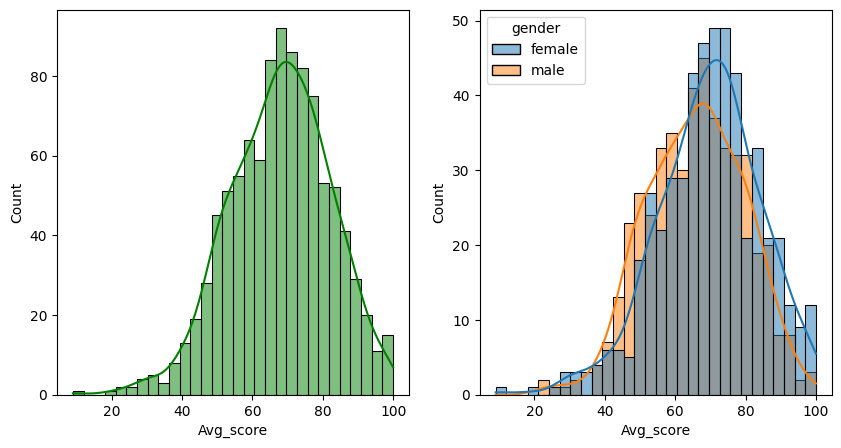

In [206]:
fig =plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(data=df , x= df['Avg_score'],bins=30,color='g',kde=True)

ax2 = fig.add_subplot(1,2,2)
sns.histplot(data=df , x= df['Avg_score'],bins=30,color='g',kde=True,hue=df['gender'])



<Axes: xlabel='Total_score', ylabel='Count'>

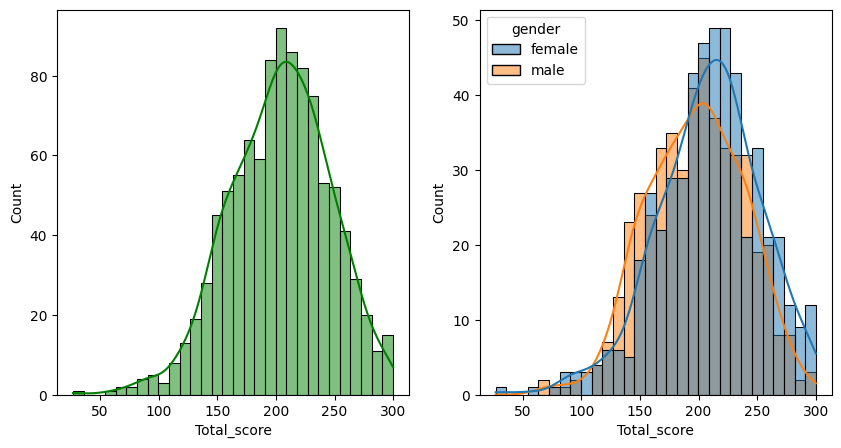

In [207]:
fig,axs =plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df , x= df['Total_score'],bins=30,color='g',kde=True)

plt.subplot(1,2,2)
sns.histplot(data=df , x= df['Total_score'],bins=30,color='g',kde=True,hue=df['gender'])



Female students tends to perform well than a male students 

In [208]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Text(0.5, 1.0, 'Females')

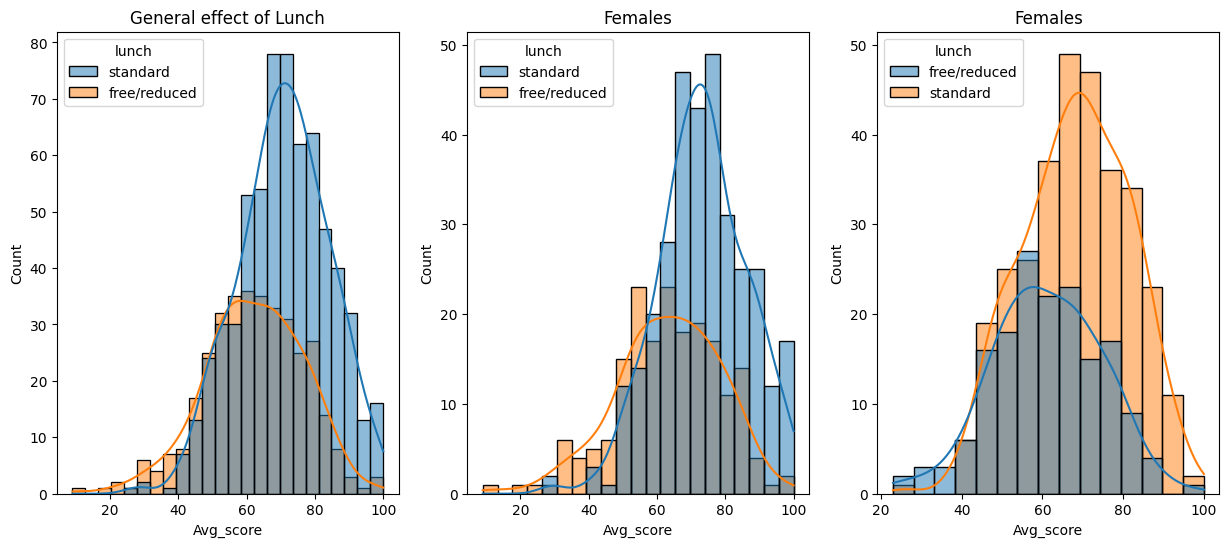

In [209]:
plt.subplots(1,3,figsize=(15,6))

plt.subplot(1,3,1)
sns.histplot(data=df, x = 'Avg_score',kde=True,hue='lunch')
plt.title('General effect of Lunch')

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='Avg_score',kde=True,hue='lunch')
plt.title('Females')

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='Avg_score',kde=True,hue='lunch')
plt.title('Females')


- Standard lunch help students perform well whether its female or male student

Text(0.5, 1.0, 'Effect of parental_level_of_education on FeMale')

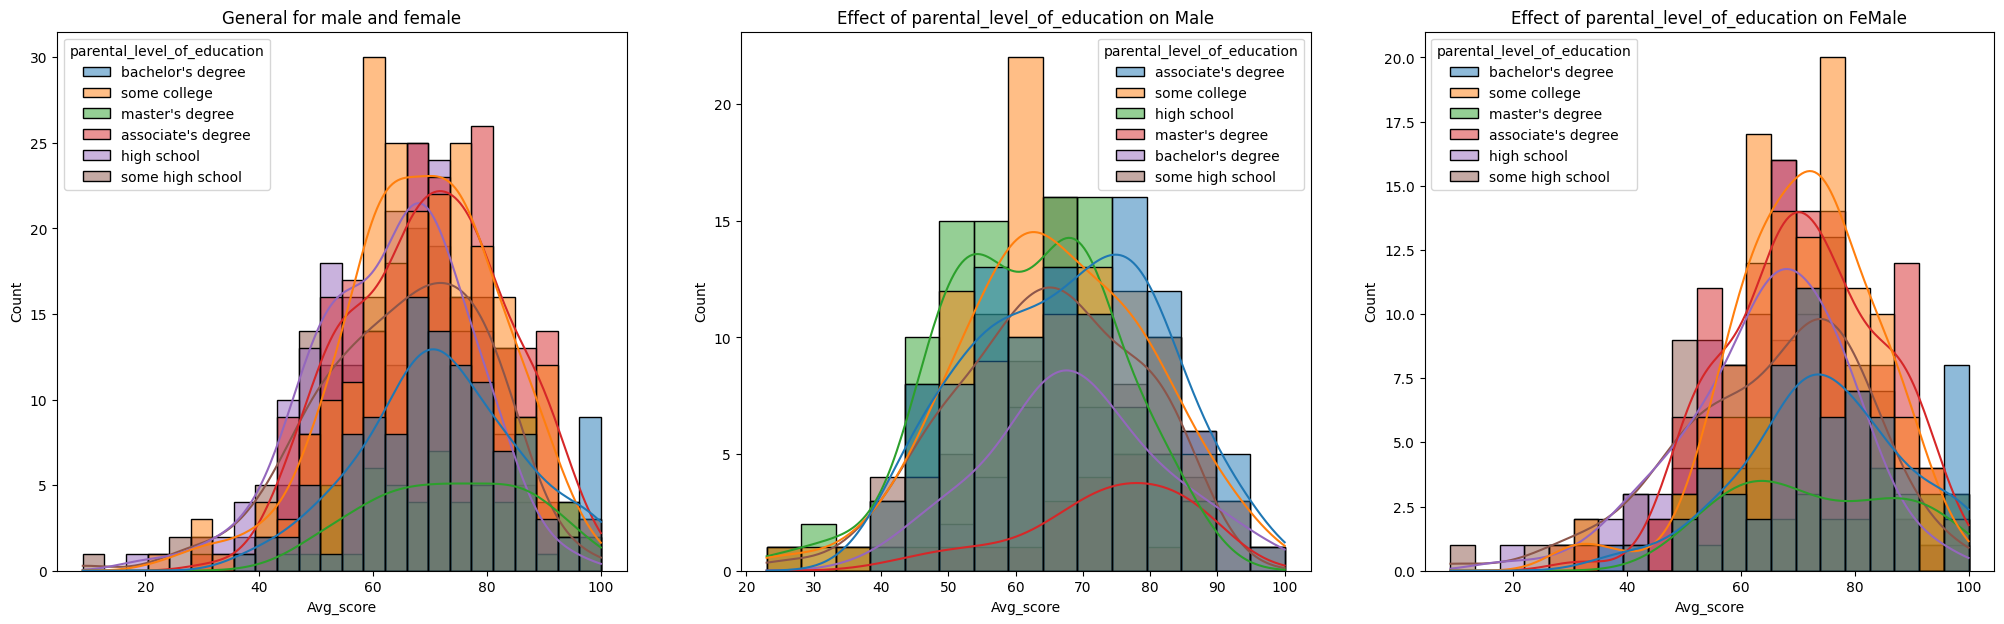

In [210]:
# Lets check the effect of parental level education on the exam score 

plt.subplots(1,3,figsize=(25,7))

plt.subplot(1,3,1)
sns.histplot(data= df, x='Avg_score',kde=True,hue='parental_level_of_education')
plt.title('General for male and female')

plt.subplot(1,3,2)
sns.histplot(data = df[df.gender=='male'],x='Avg_score',kde=True,hue='parental_level_of_education')
plt.title('Effect of parental_level_of_education on Male')

plt.subplot(1,3,3)
sns.histplot(data = df[df.gender=='female'],x='Avg_score',kde=True,hue='parental_level_of_education')
plt.title('Effect of parental_level_of_education on FeMale')

- Students with parental level education with some clg. tend's to perform well in exam 

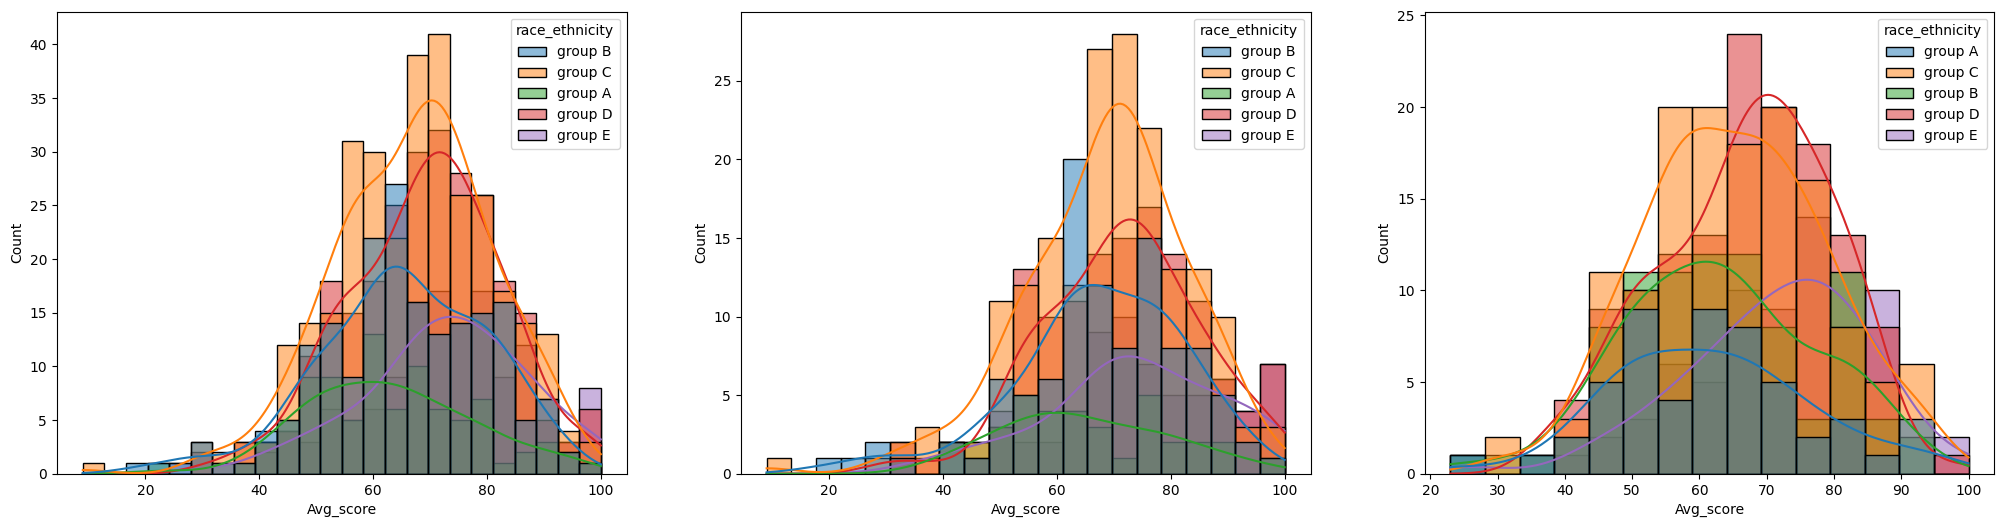

In [211]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Avg_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg_score',kde=True,hue='race_ethnicity')
plt.show()


Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

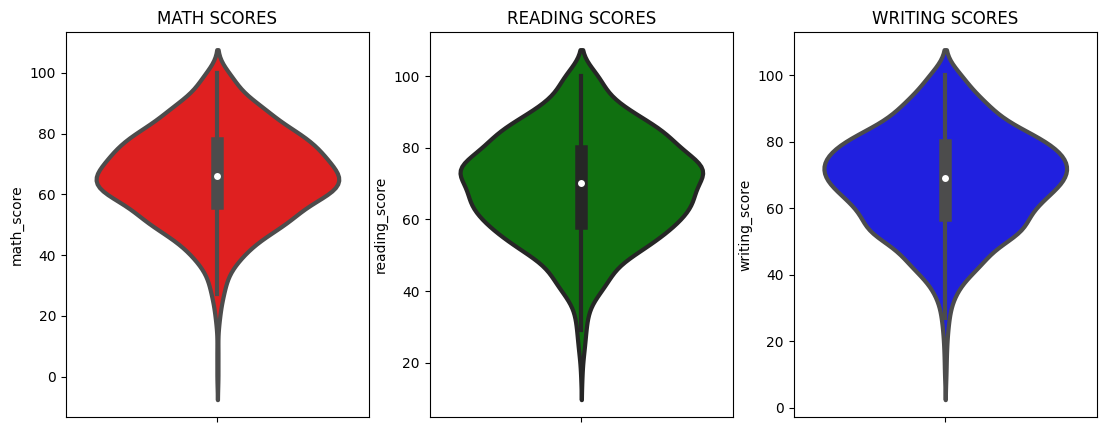

In [212]:

plt.figure(figsize=(18,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and
 
- writing most of them score from 50-80

Multivariate analysis using Pie Chart 

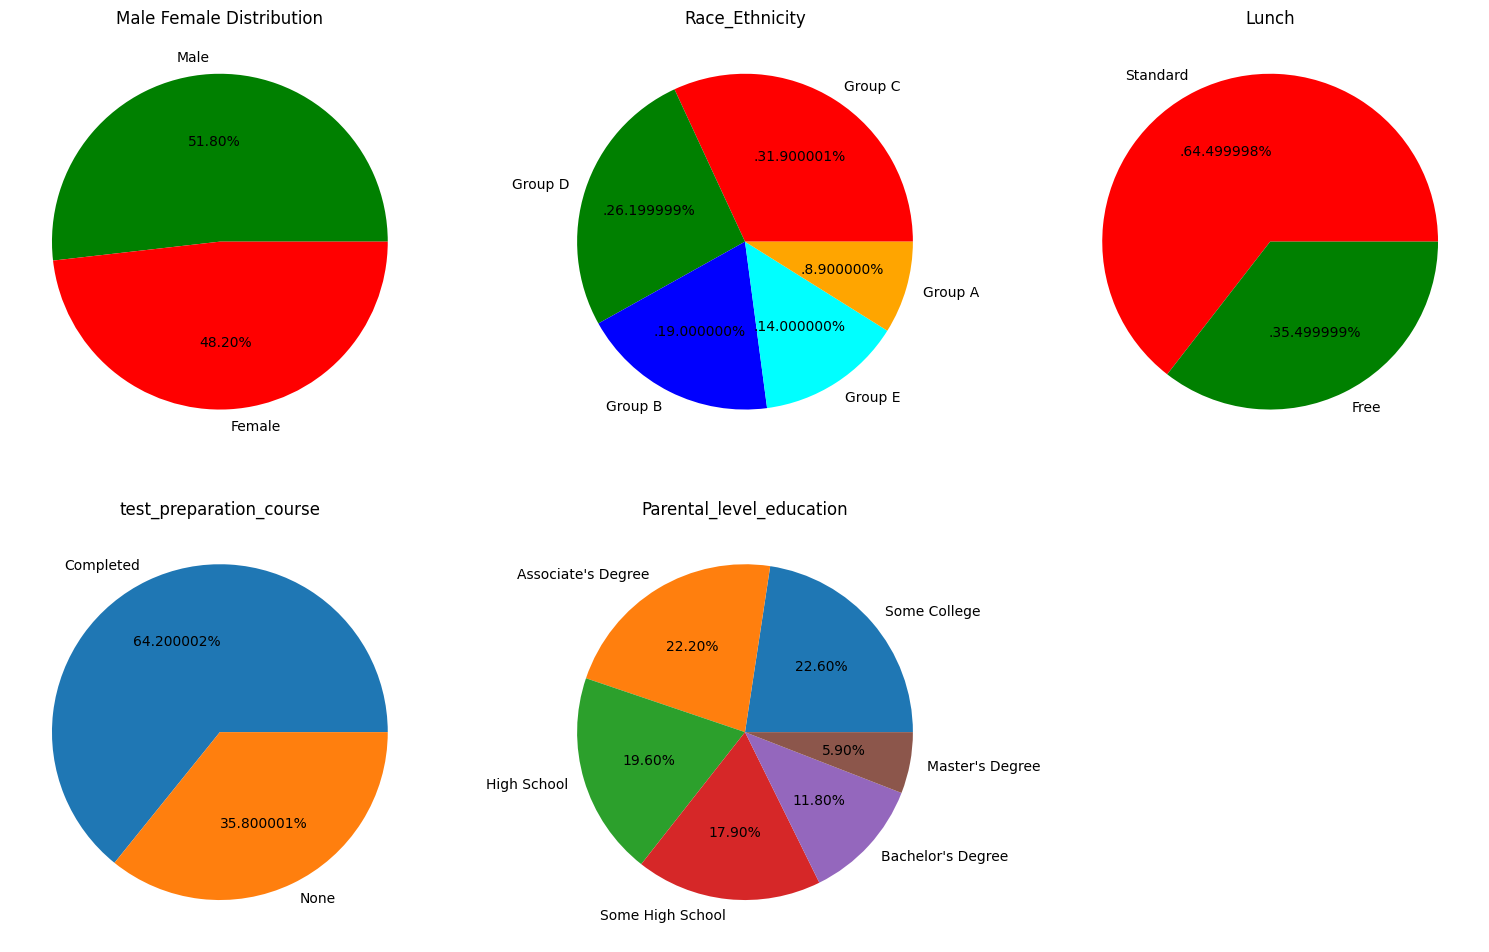

In [213]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
size = df['gender'].value_counts()
label = ['Male','Female']
color= ['g','r']

plt.pie(size,labels=label,colors=color,autopct='%.2f%%')
plt.axis('off')
plt.title('Male Female Distribution')

plt.subplot(2,3,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity')
plt.axis('off')

plt.subplot(2,3,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch')
plt.axis('off')

plt.subplot(2,3,4)
size = df['test_preparation_course'].value_counts()
label = ['Completed','None']

plt.pie(size,labels=label,autopct='%2f%%')
plt.title('test_preparation_course')
plt.axis('off')
plt.grid(True)

plt.subplot(2,3,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"

plt.pie(size,labels=labels,autopct='%.2f%%')
plt.title('Parental_level_education')

plt.tight_layout()
plt.grid(True)
plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature Wise Visualization:

#### 4.4.1 Gender Column
- How is distribution of gender ?
- Is gender has any impact ont he student performance ?

#### Univariate Analysis 

([<matplotlib.patches.Wedge at 0x277be1e8260>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

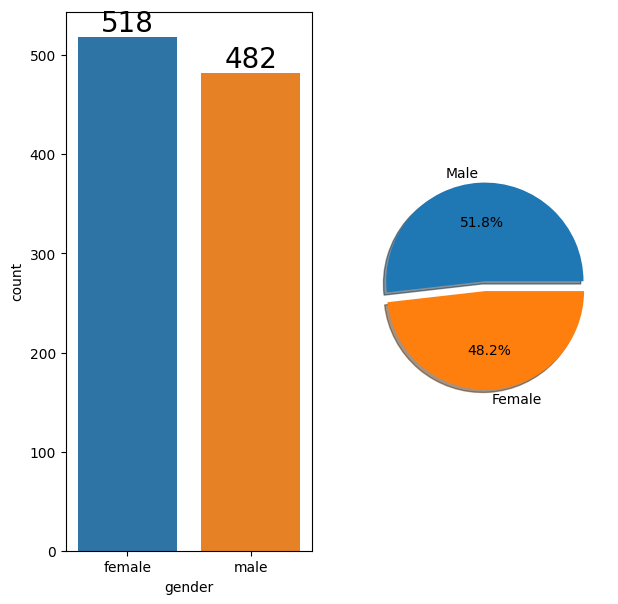

In [214]:
f,ax = plt.subplots(1,2,figsize=(7,7))
plt.subplot(1,2,1)
sns.countplot(x=df['gender'],data=df,saturation=0.80)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(1,2,2)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)

- Gender has balance data with female 48% and male with 52%

#### Bivariate Analysis (Is Gender has any imapact on the student performance)

In [215]:
gender_group = df.groupby('gender')[['Avg_score', 'math_score']].mean()


Text(0.5, 1.0, 'Avg_score vs the math score')

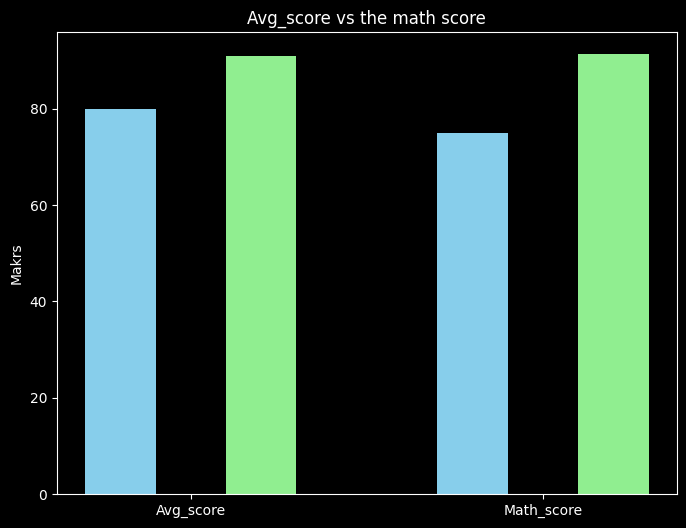

In [239]:
plt.style.use('dark_background')


X = ['Avg_score','Math_score']

x_axis = np.arange(len(X))


female_score = [gender_group['Avg_score'][0],gender_group['math_score'][0]]
male_score = [gender_group['Avg_score'][1],gender_group['math_score'][1]]
plt.figure(figsize=(8,6))
plt.bar(x_axis - 0.2,male_scores,0.2,label='Male',color='skyblue')
plt.bar(x_axis + 0.2,female_scores,0.2,label='Female',color='lightgreen')
plt.xticks(x_axis,X)
plt.ylabel('Makrs')
plt.title('Avg_score vs the math score')

- Female students have score more then male student 

#### 4.4.2 Race/Ethnicity Column 

- How is group wise distribution ?
- Is Race/Ethinicity has any impact on students performance?


#### Univariate analysis on the Race/Ethnicity column 

([<matplotlib.patches.Wedge at 0x277bf633350>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.5380598657352365, -1.0726097057574016, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')])

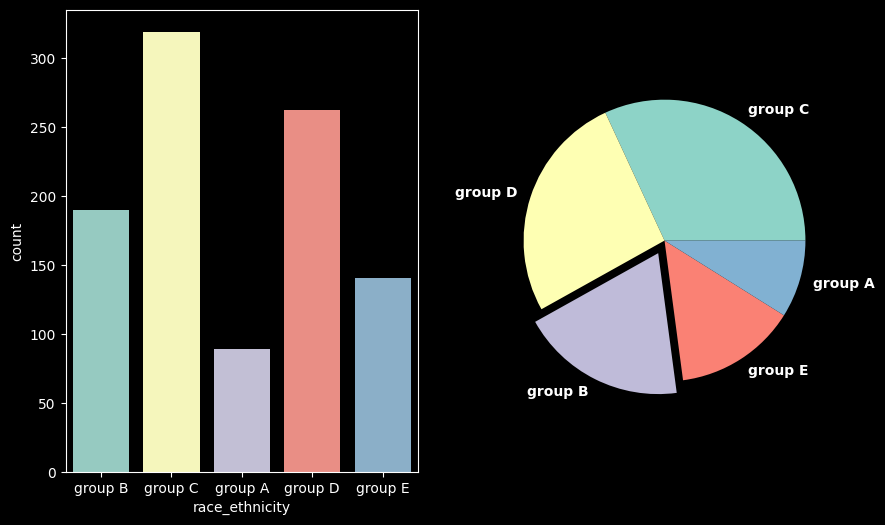

In [253]:
f=plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=df['race_ethnicity'],data=df)
for container in ax[0].containers:
    ax[0].bar_label(contaoner,color='black')


plt.subplot(1,2,2)
plt.pie(df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0,0,0.1,0,0],textprops={'fontweight':'bold'})

Insights

- Most of the students belongs to group c and d 
- Lowest number of students belongs to Group A 

#### Bivariate analysis on the race_ethnicity 
(To see is there any impact on the student performance due to race_ethnicity)

In [255]:
group_race = df.groupby('race_ethnicity')

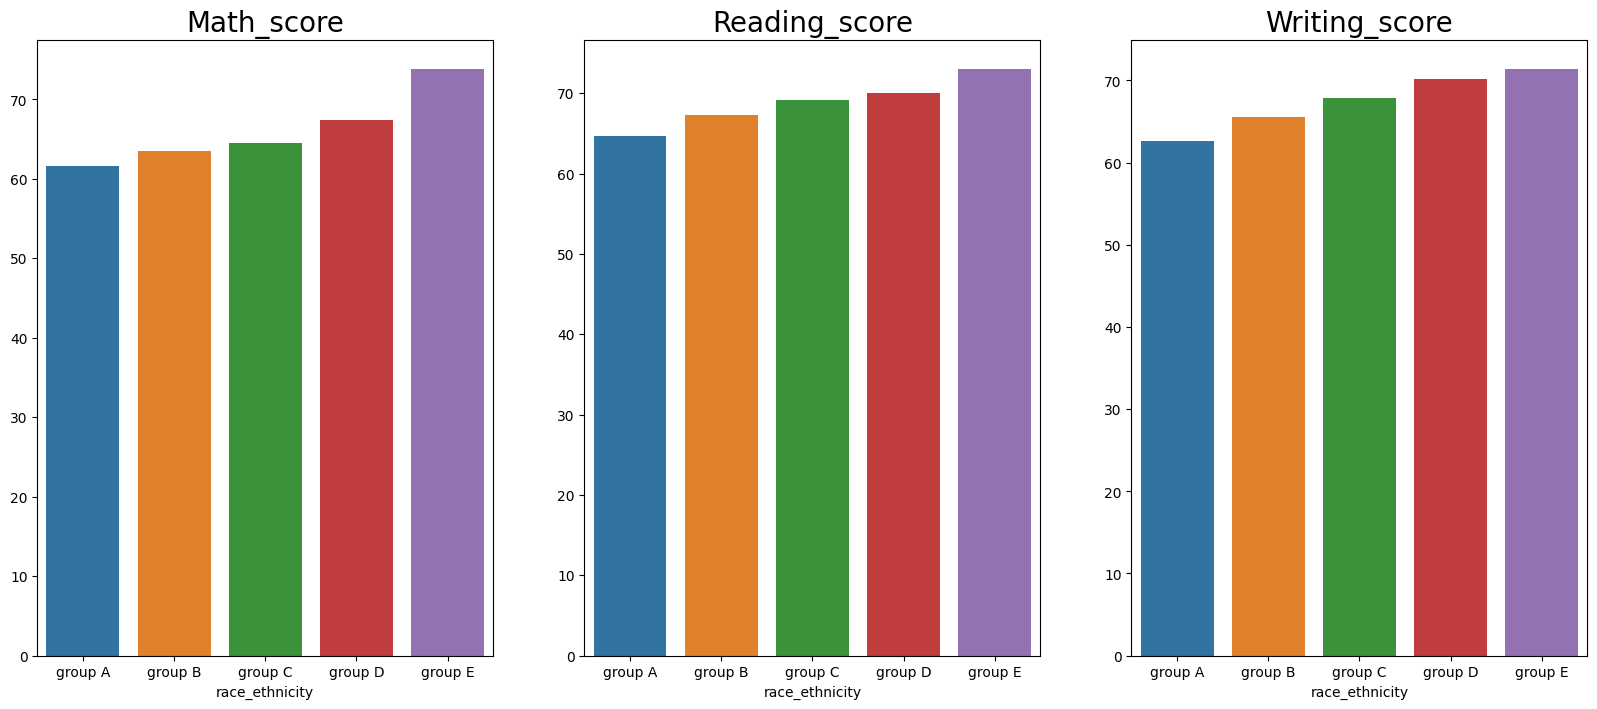

In [267]:
plt.style.use('default')

f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x= group_race['math_score'].mean().index, y = group_race['math_score'].mean().values,ax=ax[0])
for container in ax[0].containers:
    ax[0].set_title('Math_score',size=20,)

sns.barplot(x= group_race['reading_score'].mean().index, y = group_race['reading_score'].mean().values,ax=ax[1])
for container in ax[1].containers:
    ax[1].set_title('Reading_score',size=20,)

sns.barplot(x= group_race['writing_score'].mean().index, y = group_race['writing_score'].mean().values,ax=ax[2])
for container in ax[2].containers:
    ax[2].set_title('Writing_score',size=20,)


Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects


### 4.4.3 Univariate analysis on the parental level education 
Let's see what is the educational background of parents of the students. 

Text(0.5, 1.0, 'Parent education and count')

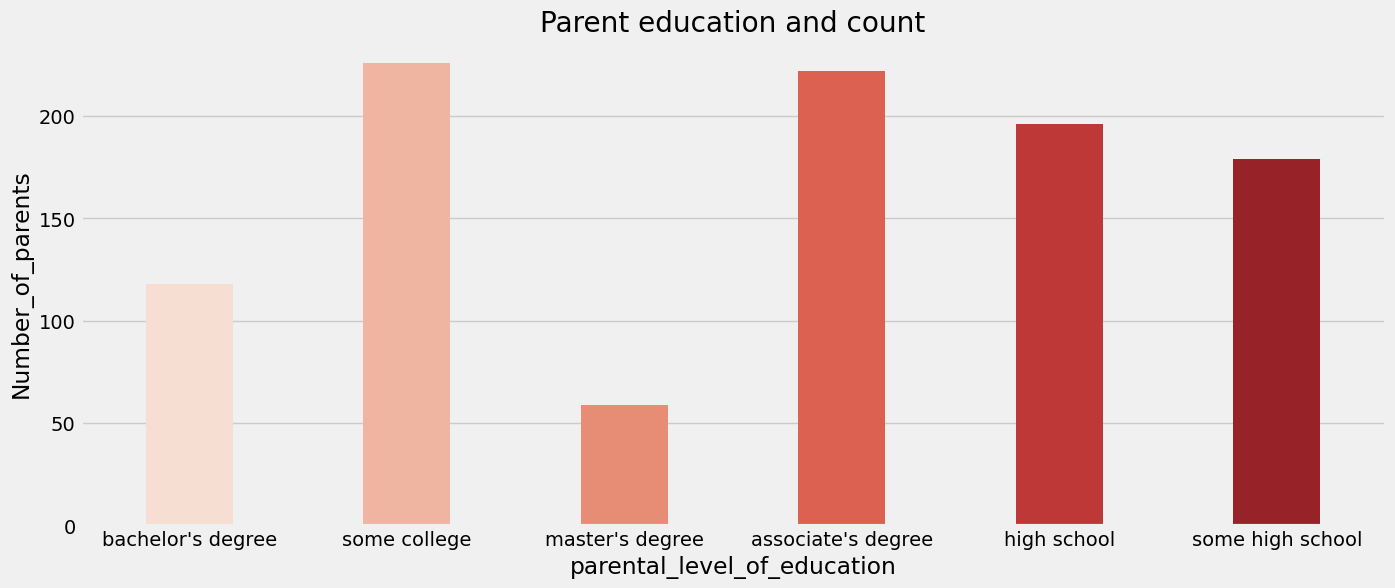

In [282]:
plt.rcParams['figure.figsize']=(15,6)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],data=df,palette='Reds',width=0.4)
plt.title('Parental level education',fontweight=30)
plt.xlabel('parental_level_of_education')
plt.ylabel('Number_of_parents')
plt.title('Parent education and count')

- Largest number of parents are from some college 

In [297]:
g = df.groupby('parental_level_of_education')[['Avg_score','math_score','reading_score','writing_score']].mean()

<Axes: xlabel='parental_level_of_education'>

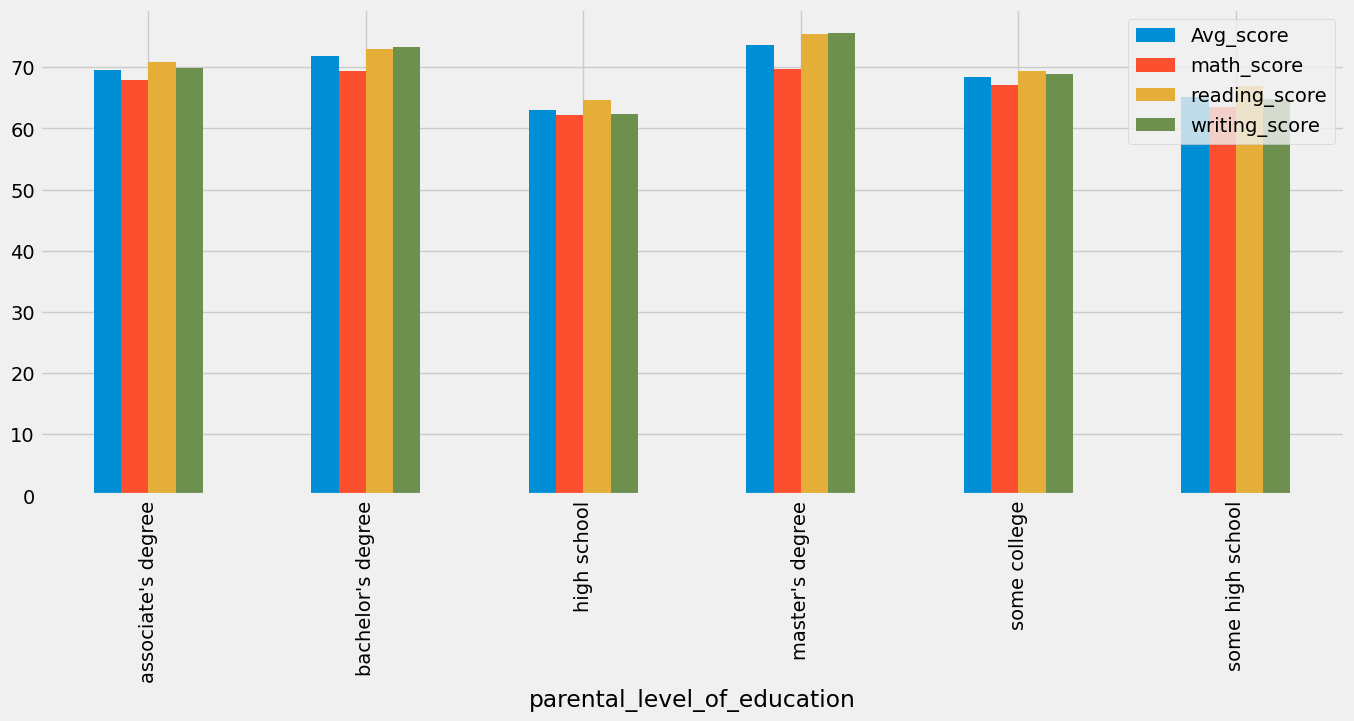

In [300]:
g.plot(kind='bar')

Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

#### Univariate analysis on the Luch column 

Text(0.5, 1.0, 'Comparison of Lunch type most students prefer')

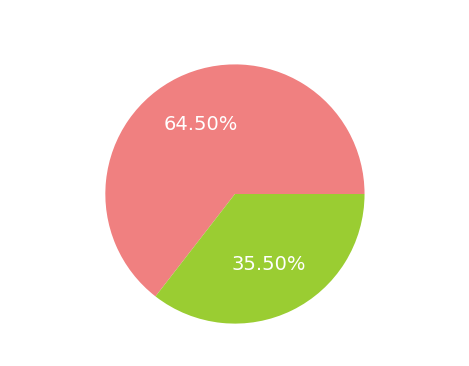

In [327]:
fig = plt.figure(figsize=(7,4))
label= ['Standard','free']
colors = ['lightcoral', 'yellowgreen']
fig.patch.set_alpha(0)
plt.pie(x=df['lunch'].value_counts(),labels=label,autopct='%.2f%%',colors=colors,textprops={'color':'white'})
plt.title('Comparison of Lunch type most students prefer',color='white',size='12',fontweight='bold')

Most of the students prefer standard lunch

#### Bivariate analysis on the lunch and test preperation course

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

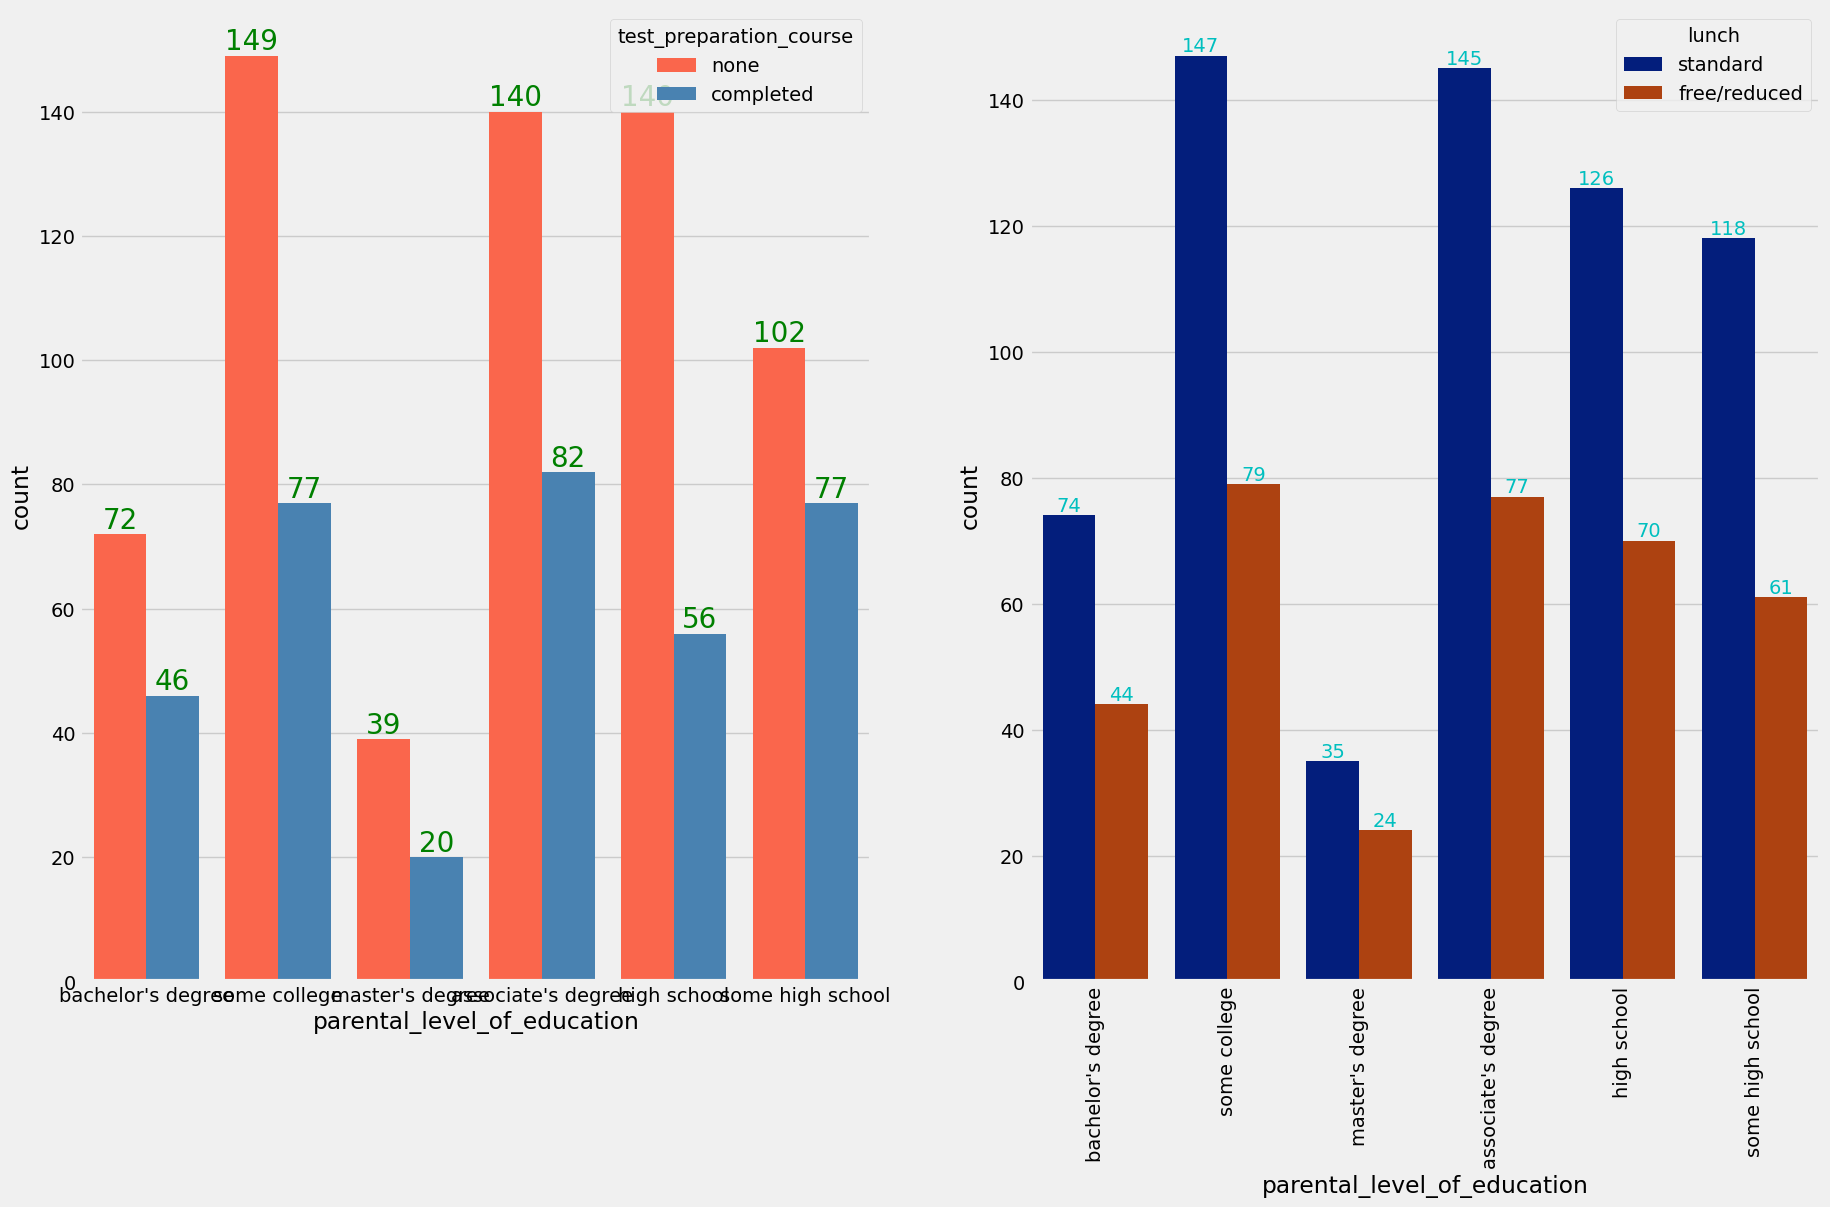

In [364]:
f,ax = plt.subplots(1,2,figsize=(20,12))
custom_colors = ['#FF6347', '#4682B4']
sns.countplot(x=df['parental_level_of_education'],data=df,palette=custom_colors,hue='test_preparation_course',ax = ax[0],color=['maroon','cyan'],saturation=0.95)


for container in ax[0].containers:
    ax[0].bar_label(container,color='g',size=20)



sns.countplot(x = df['parental_level_of_education'],data = df,palette='dark',hue ='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='c')

plt.xticks(rotation=90)


In [333]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### 4.4.5 Test preperation course Univariate analysis 

<Axes: xlabel='lunch', ylabel='writing_score'>

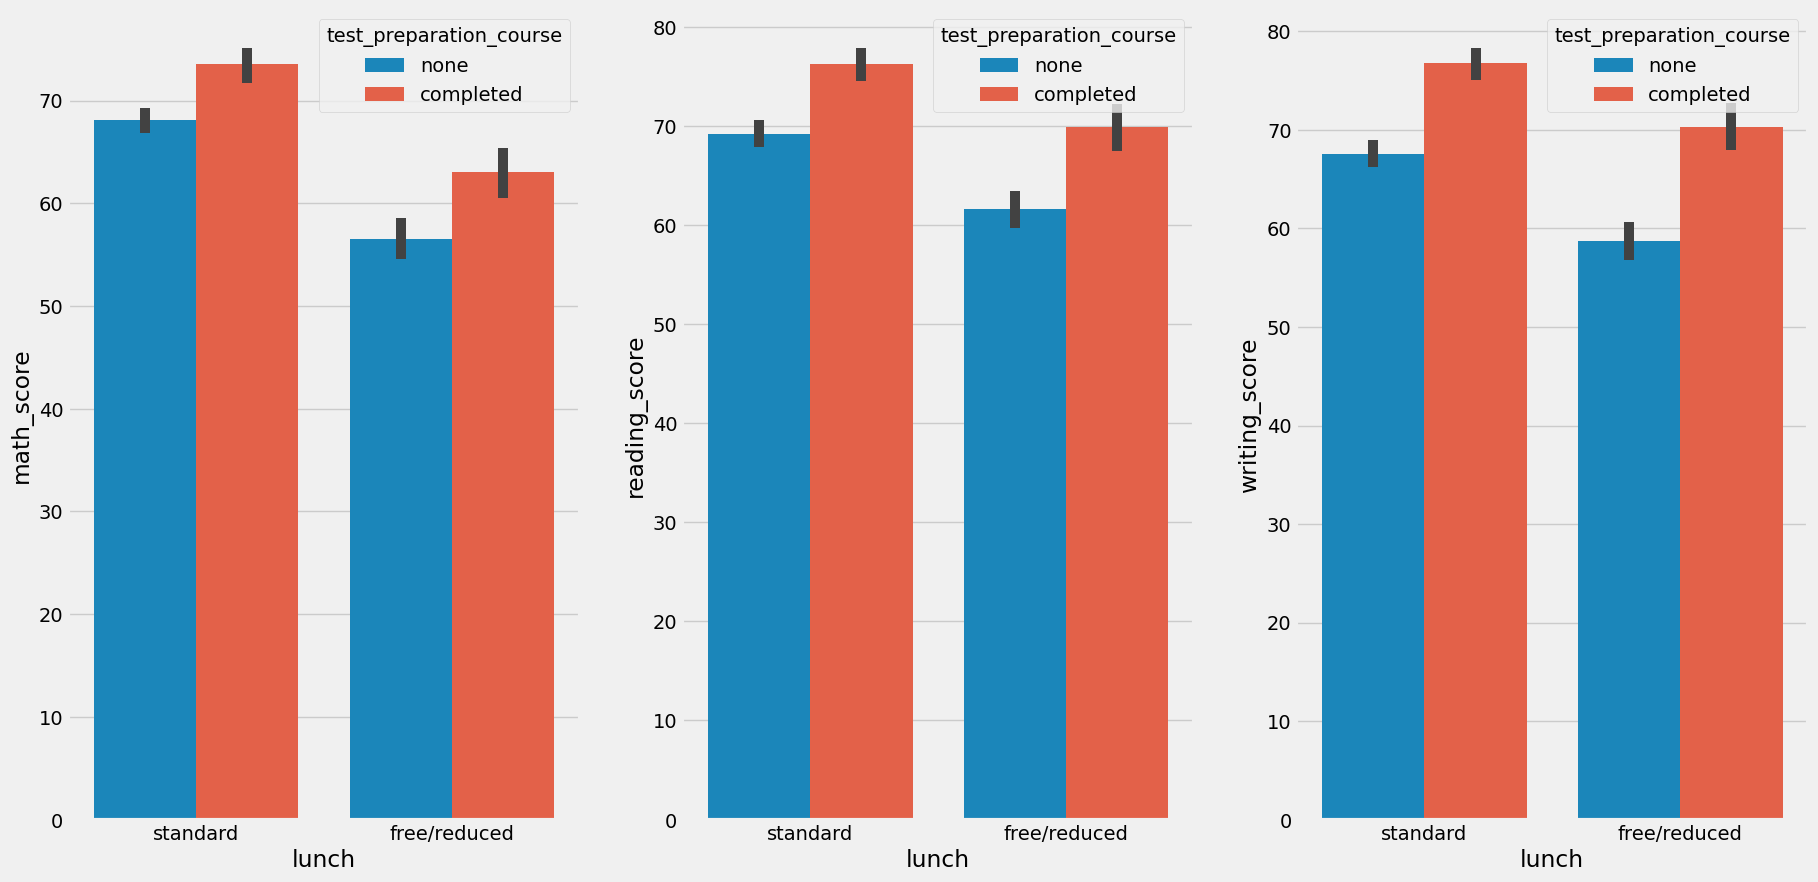

In [376]:
f,ax = plt.subplots(1,3,figsize=(20,10))
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'],ax=ax[0])
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'],ax=ax[1])
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'],ax=ax[2])

Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### checking outliers

<Axes: >

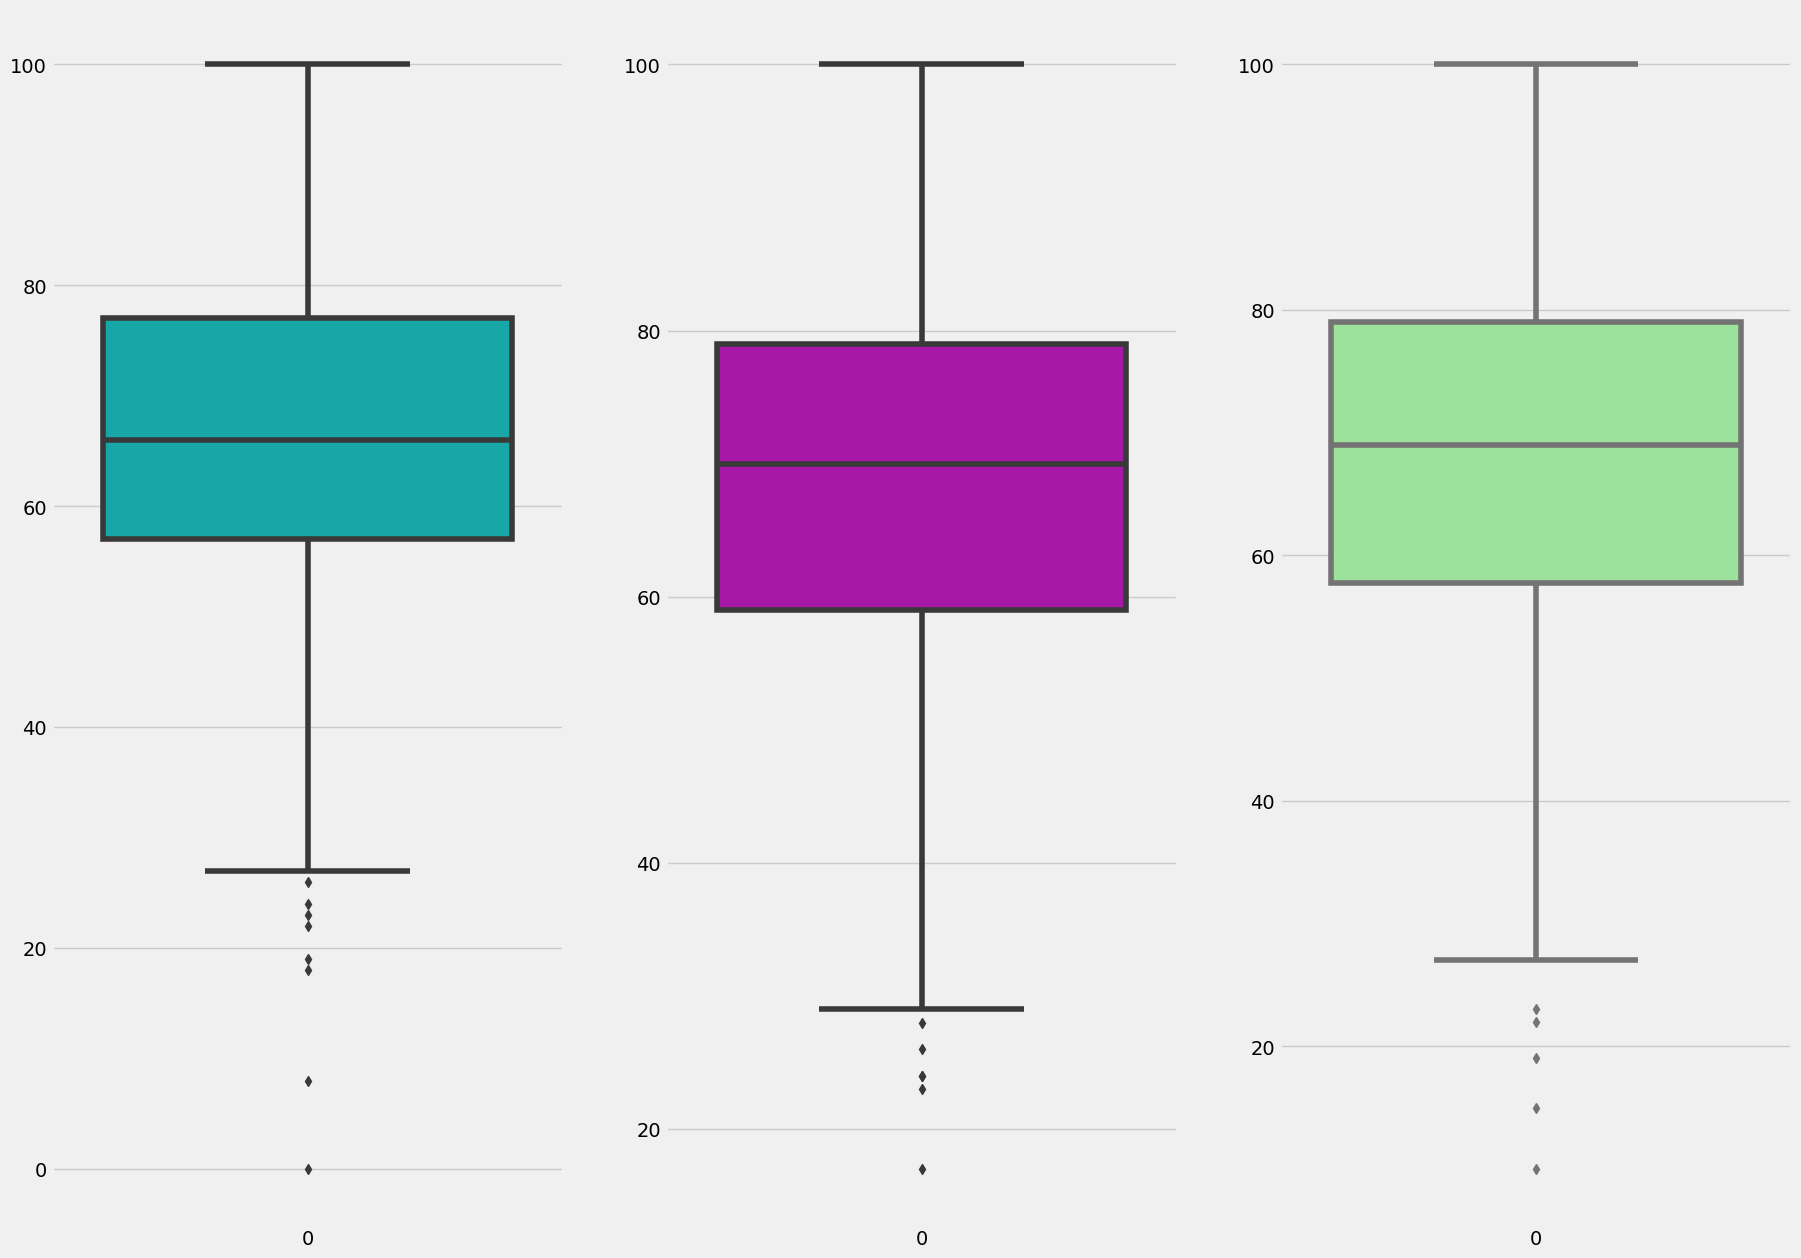

In [381]:
f,ax= plt.subplots(1,3,figsize=(20,15))
sns.boxplot(df['math_score'],color='c',ax=ax[0])
sns.boxplot(df['reading_score'],color='m',ax=ax[1])
sns.boxplot(df['writing_score'],color='lightgreen',ax=ax[2])




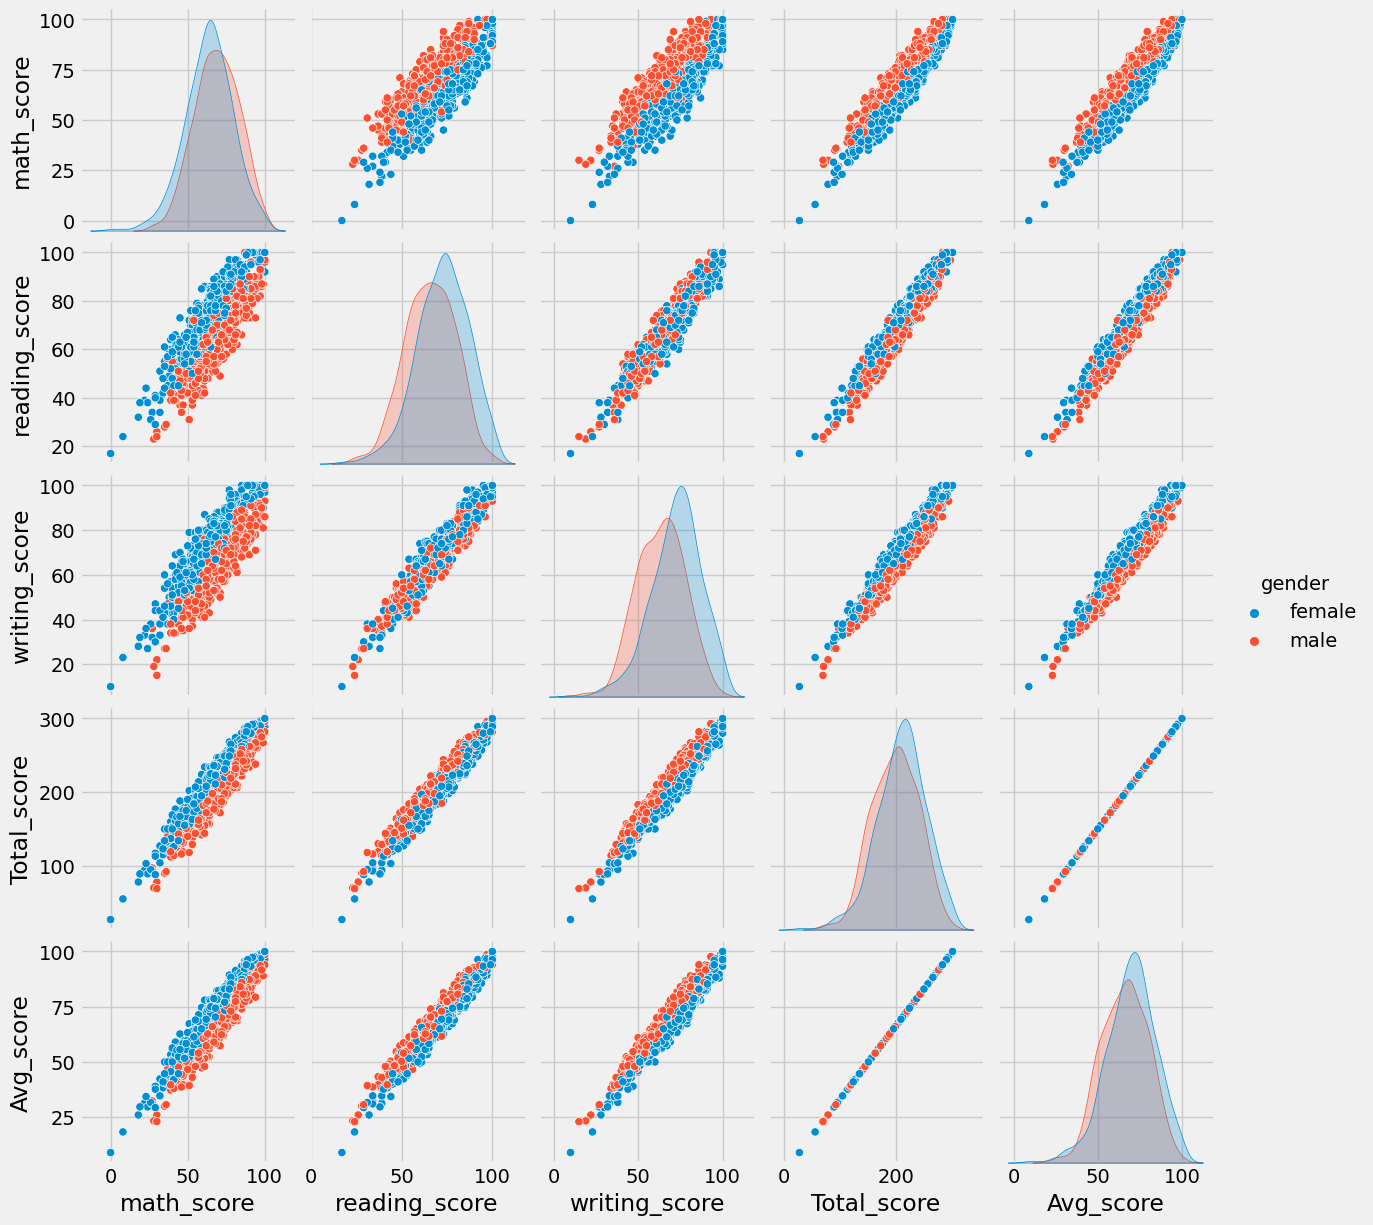

In [382]:
sns.pairplot(df,hue='gender')

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

In [387]:
num = df.select_dtypes(include=['number'])

In [389]:
corr= num.corr()

<Axes: >

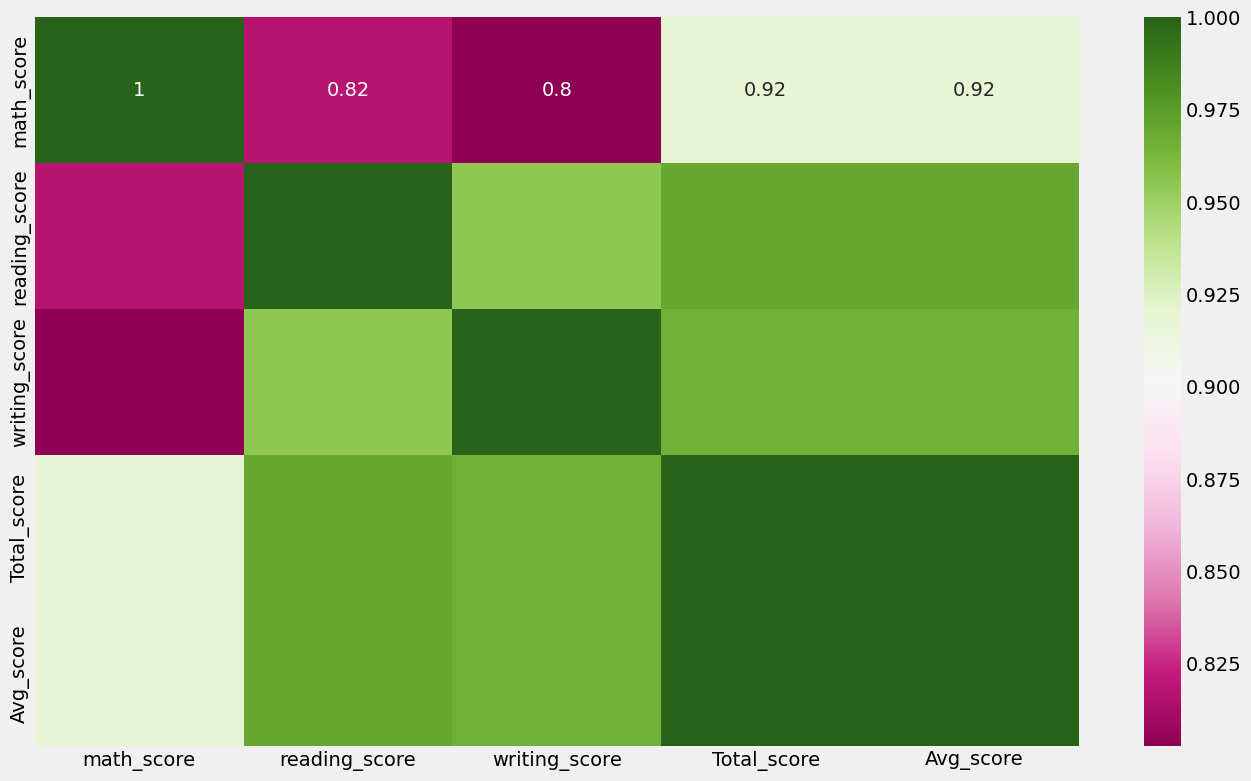

In [396]:
sns.heatmap(corr,annot=True,cmap='PiYG')

In [415]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    The linewidth 

<Axes: xlabel='math_score', ylabel='Total_score'>

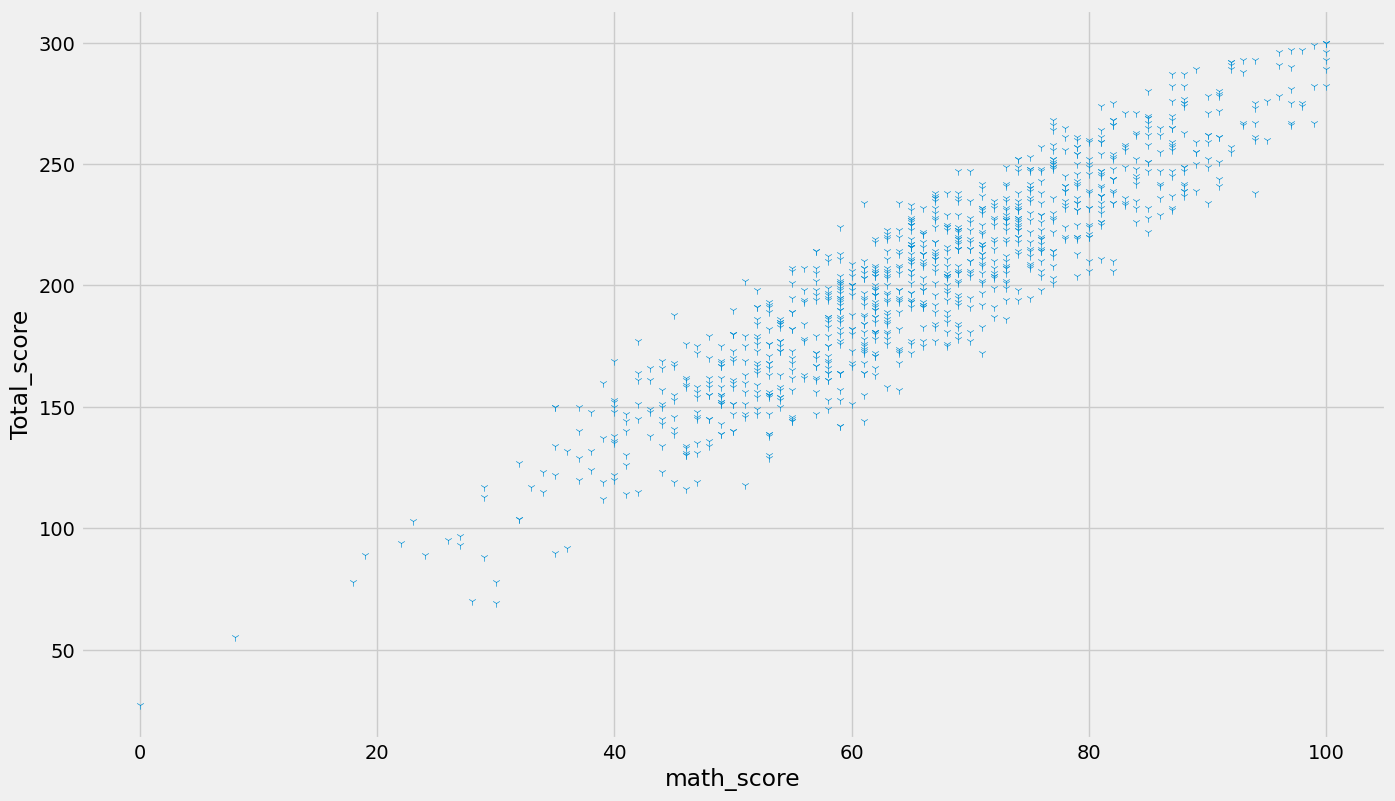

In [421]:
sns.scatterplot(data=df,x=df['math_score'],y=df['Total_score'],marker='1')

In [417]:
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or mo